# PA 2: Classification - Decision Tree

## Student Details (1 Point)

* Student Name and ID: <b>Bhogal, Gurvir Singh Tarlok Singh, UTA ID: 1001769871</b> <-- Only this student will submit the assignment

* Student Name and ID: <b>Rohith Rajagopalan Ramesh Babu, UTA ID: 1001518031</b>

* Notes: When submitting, fill your name and ID in this cell. [1 point]
* Do not to forget to cite any external sources used by you.

* Programming Assignment Details (7 Points)
* For this assignment use Jupyter notebook, Panda, and scikit.
* 1) Load adult dataset from train_cl.csv [1 points]
* 2) Create a dataframe and print the first and last five records of your dataset. [2 points]
* 3) Print the class labels. [2 points]
* 4) Split your dataset 70% for training, and 30% for testing the classifier. [2 points]

* DecisionTree (10 Points)
* 1) Use gini and entropy to measure the quality of a split. [2 points]
* 2) Use comments to explain your code and variable names. [1 point]
* 3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score,
* and support). [2 points]
* 4) Print the decision tree visualization. [5 points]<br/>

* Naive Bayes (10 Points)
* 1) Use Naive bayes classifier (Gaussian) to predict the test data[5 point]
* 2) Use comments to explain your code and variable names[1 point]
* 3) Calculate and print the confusion matrix, and the classification * Report (includes: precision, recall, f1-score,
* and support). [4 points]

In [1]:
import pandas as pd #importing pandas for data import and processing
import matplotlib.pyplot as plt #importing matplotlib for vizualisation
from sklearn.tree import DecisionTreeClassifier #  importing Decision Tree Classifier
from sklearn.model_selection import train_test_split #importing train_test_split function
from sklearn import metrics # importing scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix , classification_report #importing classification matrix and report
from sklearn.naive_bayes import GaussianNB #importing Gaussian Naive Bayes model
from sklearn import tree

In [2]:
df_data = pd.read_csv('train_cl.csv', encoding='latin1' )#read the csv file into a Pandas data frame
#2) Create a dataframe and print the first and last five records of your dataset. [2 points]
df_data.head() #return the first 5 rows of the dataset

,Unnamed: 0,Survived,Sex,Age,Fare,famiy,Embarked_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,...,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,isAlone
0,0,0,0,22.0,7.2500,2,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,1,1,38.0,71.2833,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2,1,1,26.0,7.9250,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3,3,1,1,35.0,53.1000,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,4,0,0,35.0,8.0500,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [3]:
df_data.tail() #return the last 5 rows of the dataset

,Unnamed: 0,Survived,Sex,Age,Fare,famiy,Embarked_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,...,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,isAlone
886,886,0,0,27.000000,13.00,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
887,887,1,1,19.000000,30.00,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
888,888,0,1,29.699118,23.45,4,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
889,889,1,0,26.000000,30.00,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
890,890,0,0,32.000000,7.75,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [4]:
#3) Print the class labels. [2 points]
df_data['Survived'].unique() #class labels

array([0, 1])

In [5]:
df_data.rename( columns={'Unnamed: 0':'Id'}, inplace=True) #renaming the unmamed column into ID
x = df_data.drop(['Id','Survived',],axis=1) # selecting the features
y = df_data.Survived # Selecting the Target variable

In [6]:
#Splitting and Training the data set into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7) # 70% training and 30% testing

Accuracy: 0.8022388059701493
[[146  16]
 [ 37  69]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       162
           1       0.81      0.65      0.72       106

    accuracy                           0.80       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



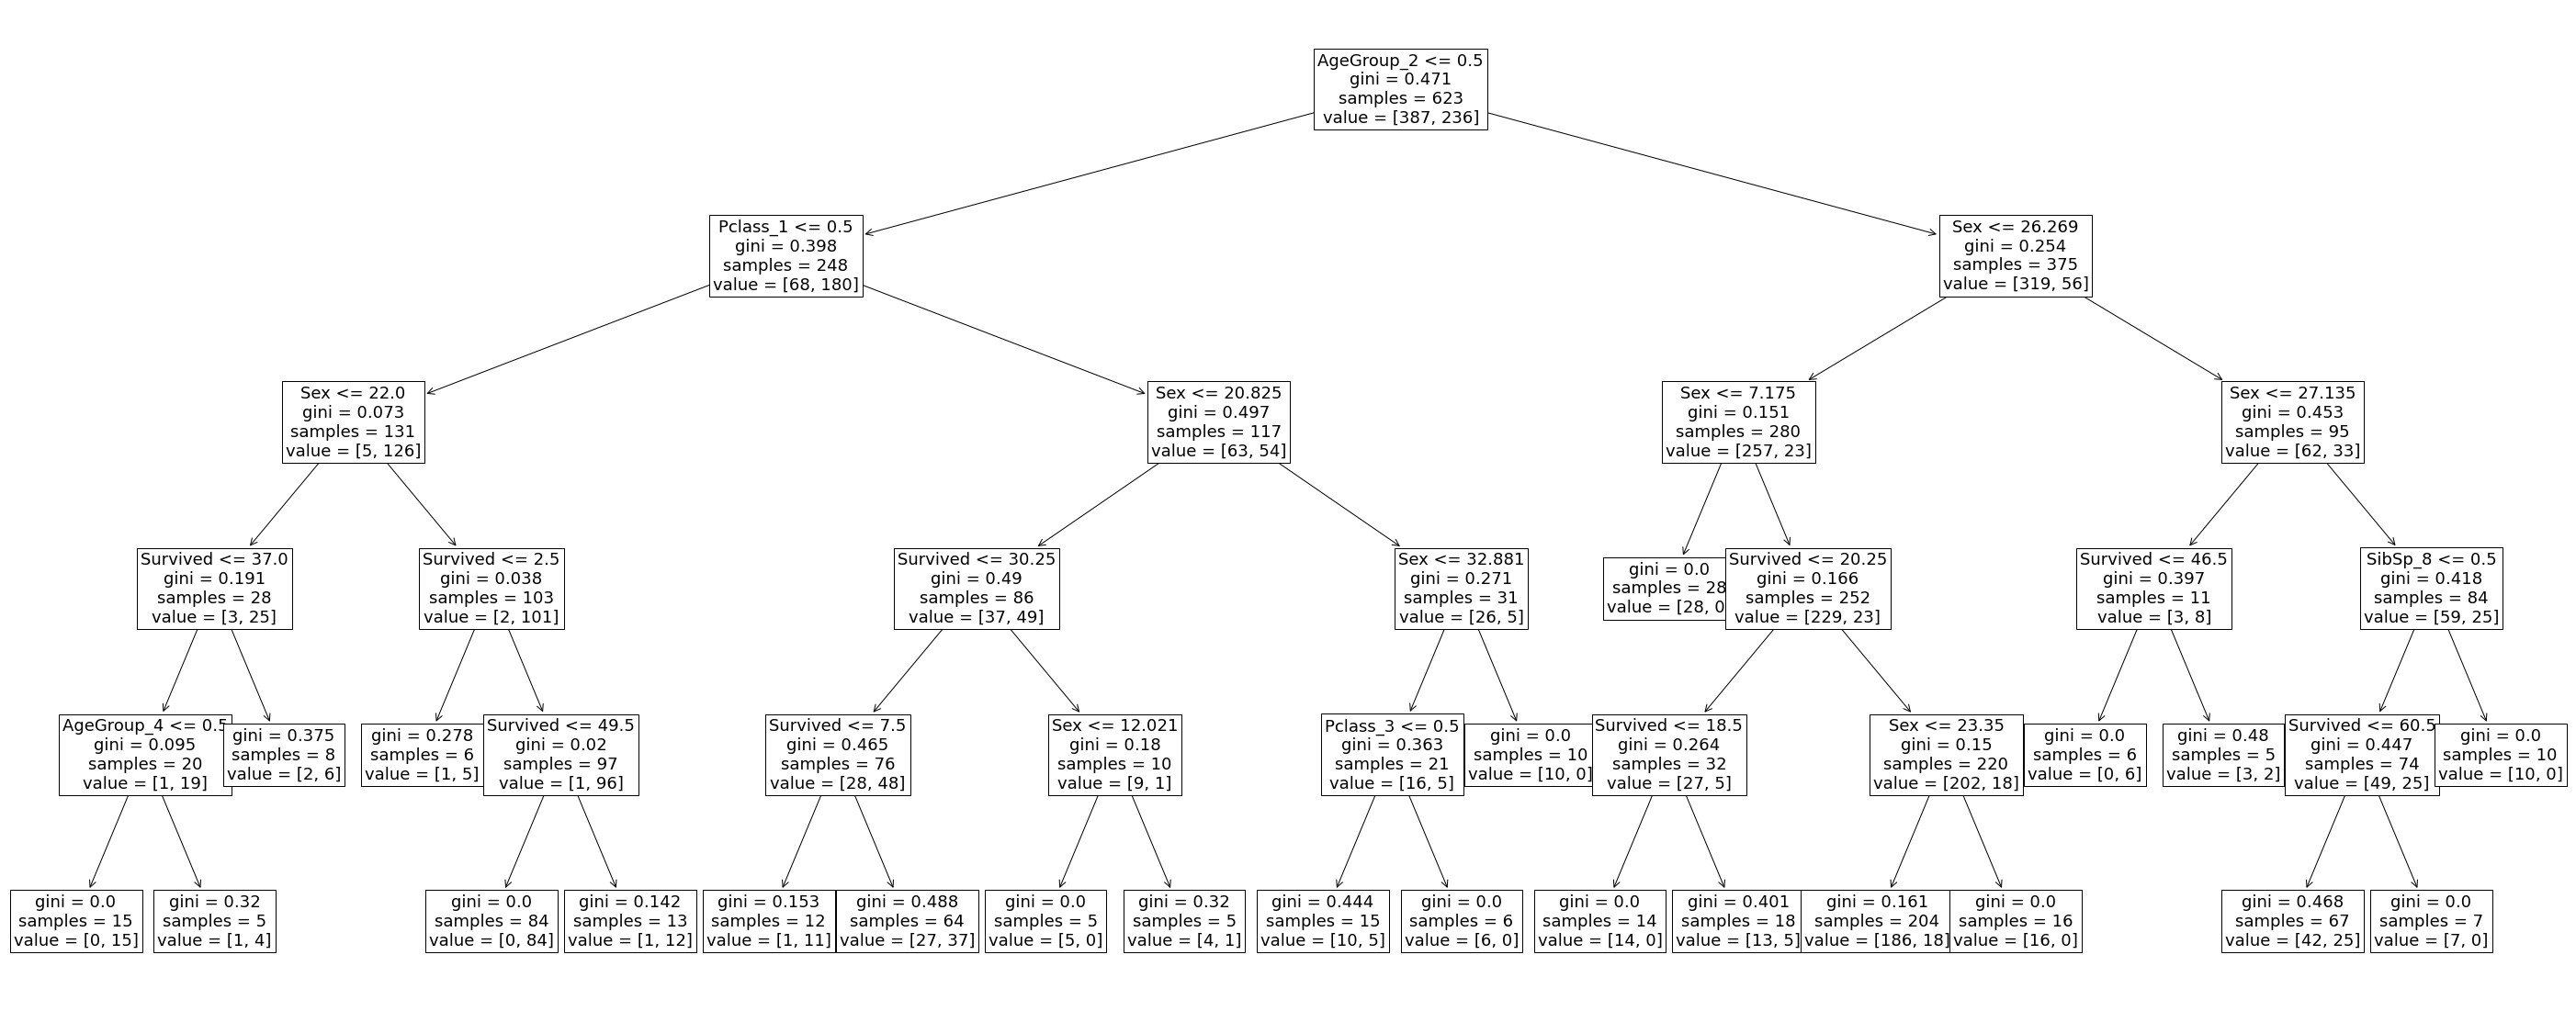

In [10]:
DTO = DecisionTreeClassifier( random_state=100, min_samples_leaf=5, criterion="gini", max_depth=5) #Creating a Decision Tree classifer object
DTO = DTO.fit(x_train,  y_train) # Training the Decision Tree Classifer
y_pred = DTO.predict(x_test) # Predicting the response for test dataset
tree.plot_tree(DTO,feature_names=list(df_data.columns[0:]), fontsize=18 ) # plotting the decision tree
plt.rcParams["figure.figsize"] = (50, 50) #adjusting the figure size
plt.xlim(0,100)
plt.ylim(0,4000)

#Evaluating the qullity of the model

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



print(confusion_matrix(y_test, y_pred))#printing the confusion matrix


print(classification_report(y_test, y_pred))# printing the Classification report

Accuracy: 0.8059701492537313
[[147  15]
 [ 37  69]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       162
           1       0.82      0.65      0.73       106

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



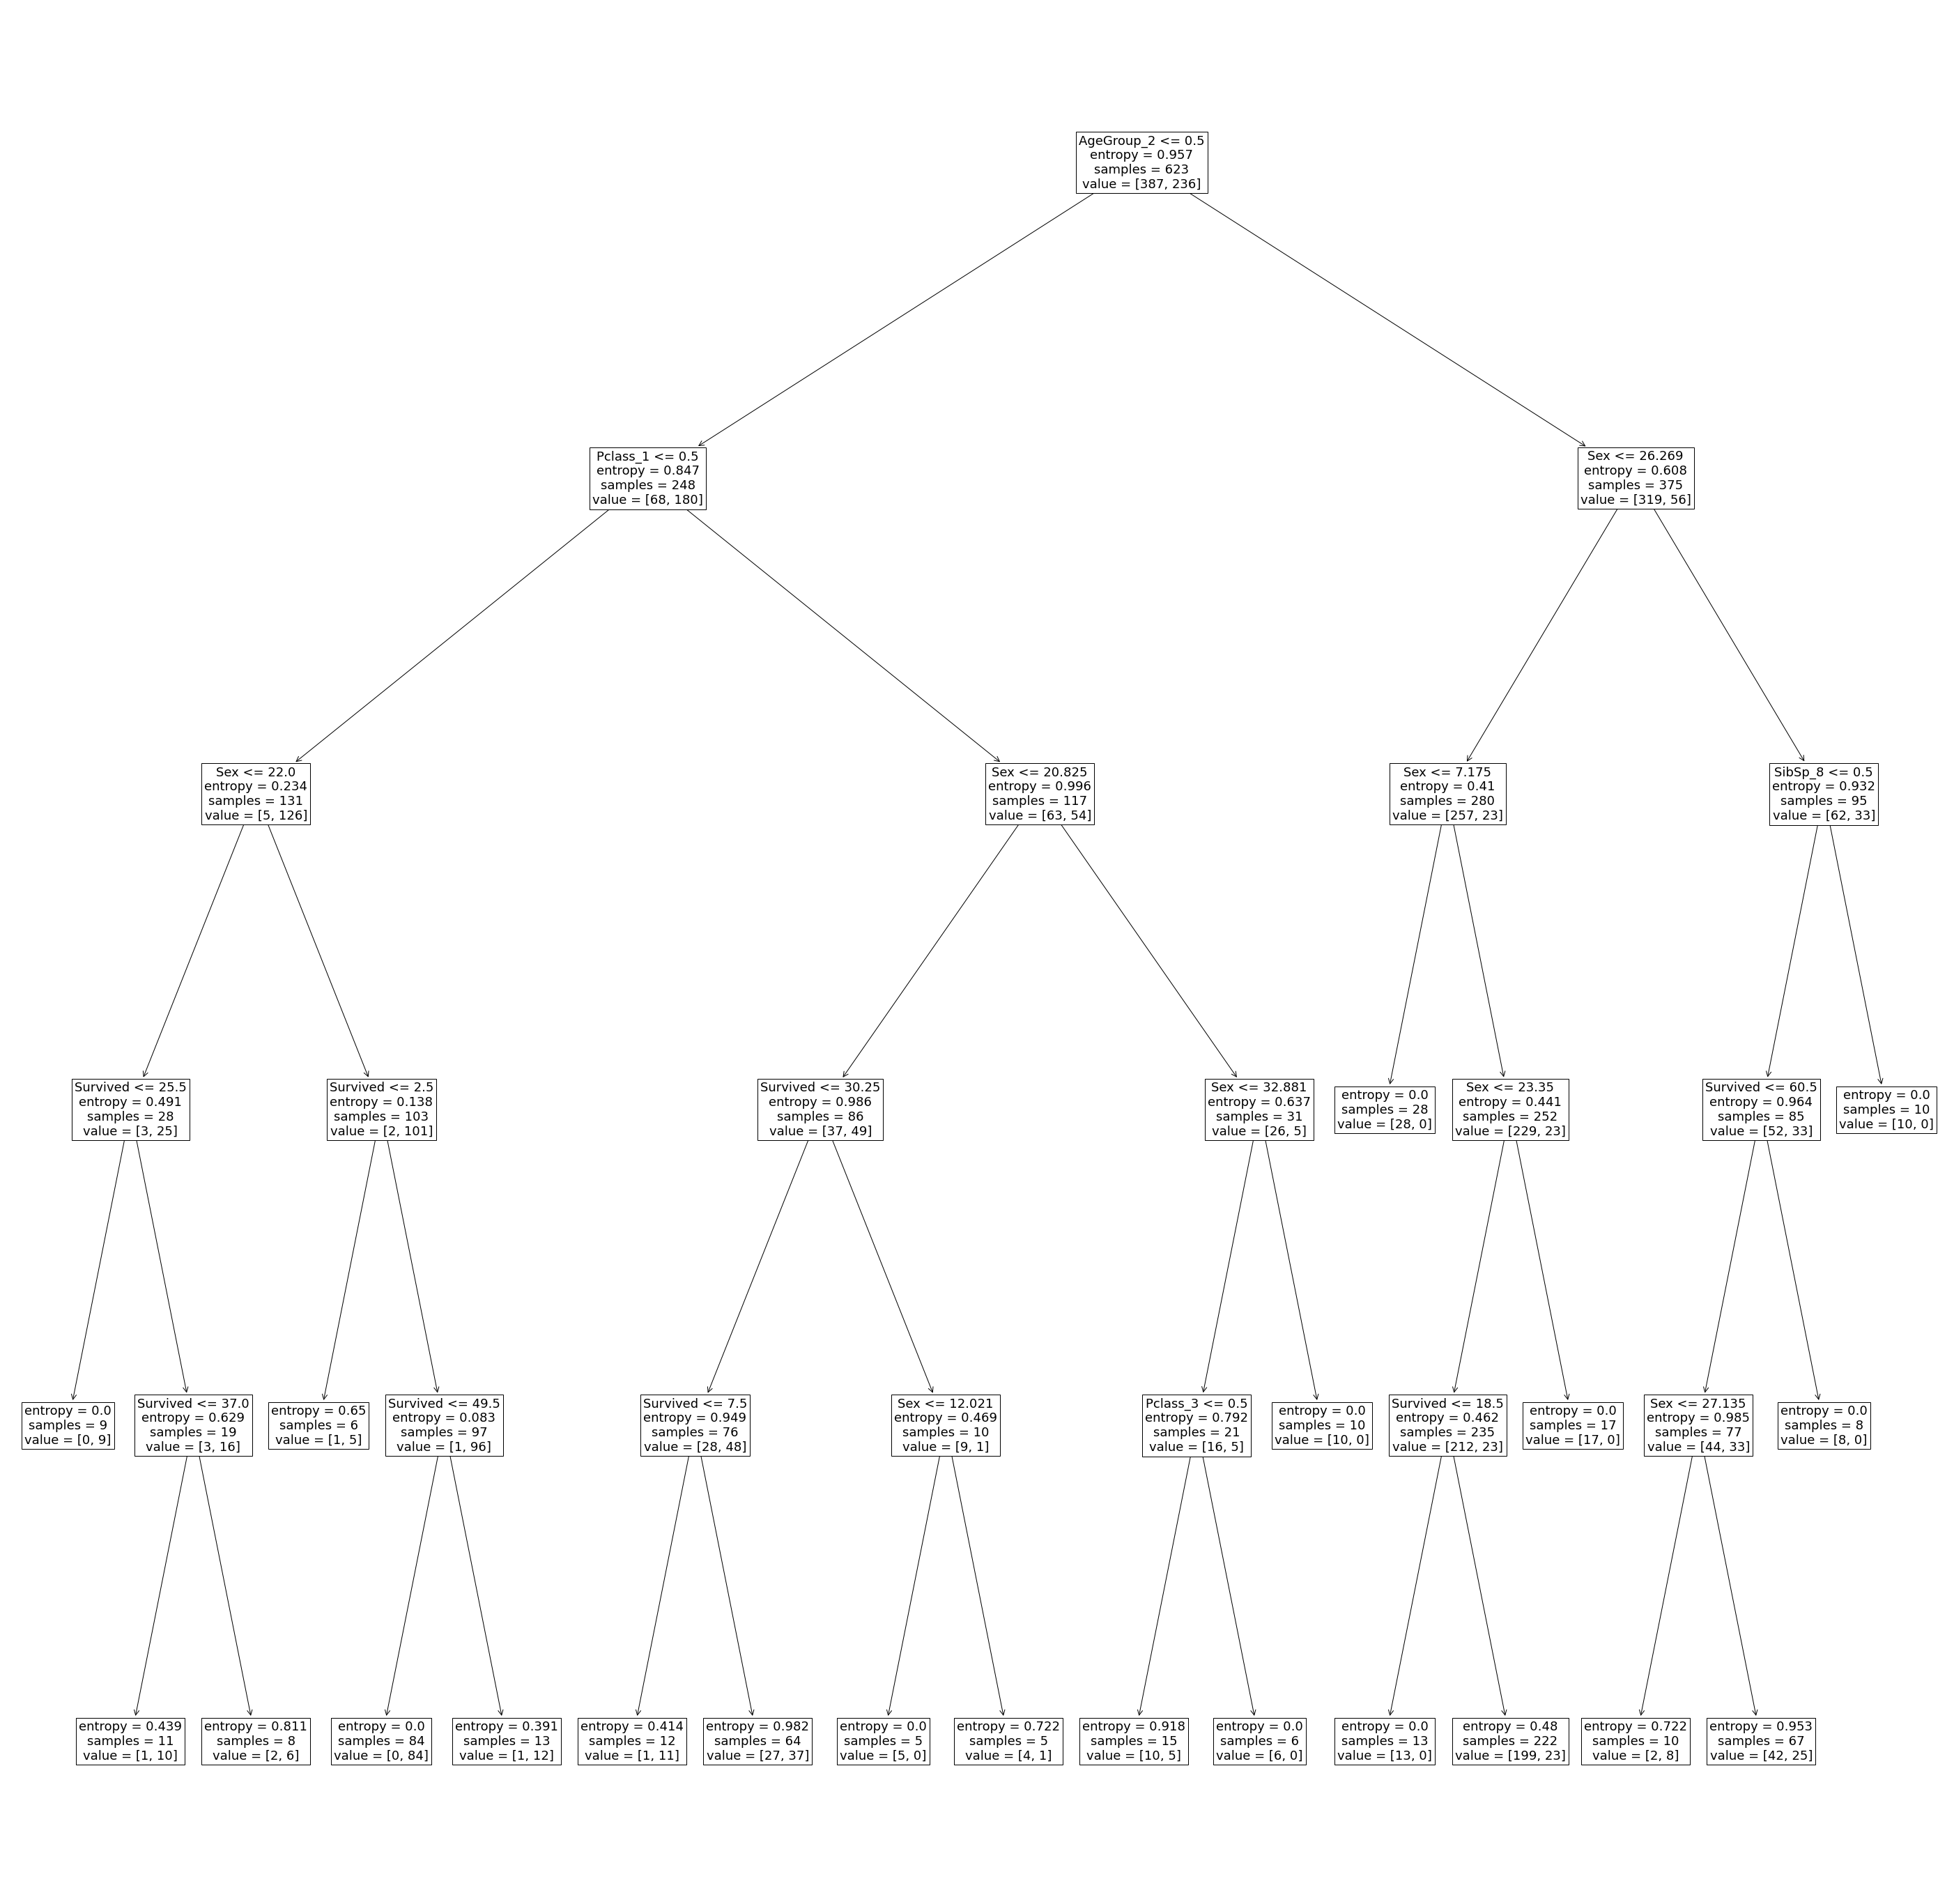

In [8]:
DO = DecisionTreeClassifier( random_state=100, min_samples_leaf=5, criterion="entropy", max_depth=5)#Creating a Decision Tree classifer object
DO = DO.fit(x_train,  y_train) # Training the dataset
y_pred = DO.predict(x_test) # Predicting the response for test dataset
tree.plot_tree(DO,feature_names=list(df_data.columns[0:]), fontsize=18 ) # adjusting the figure size
plt.rcParams["figure.figsize"] = (50, 20) # adjusting the figure size
plt.xlim(0,100)
plt.ylim(0,4000)

#Evaluating Model 


print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # Model Accuracy, how often is the classifier correct?



print(confusion_matrix(y_test, y_pred)) # printing Confusion Matrix 


print(classification_report(y_test, y_pred)) # printing Classification report 

In [9]:

gnb = GaussianNB() #Creating a Gaussian Classifier object
gnb.fit(x_train, y_train) #Training the model using the training sets
y_pred = gnb.predict(x_test) #Predicting the response for test dataset

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))# printing the Confusion Matrix 


print(classification_report(y_test, y_pred)) # printing the Classification report

Accuracy: 0.4253731343283582
[[  8 154]
 [  0 106]]
              precision    recall  f1-score   support

           0       1.00      0.05      0.09       162
           1       0.41      1.00      0.58       106

    accuracy                           0.43       268
   macro avg       0.70      0.52      0.34       268
weighted avg       0.77      0.43      0.29       268

